In [2]:
import pandas as pd
import requests

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

# Download the file
def download_file(url, local_filename):
	with requests.get(url, stream=True) as r:
		r.raise_for_status()
		with open(local_filename, 'wb') as f:
			for chunk in r.iter_content(chunk_size=8192):
				f.write(chunk)
	return local_filename

download_file(path, "drug200.csv")
path = "drug200.csv"


In [3]:
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# these are my features (data that will be used to predict)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values # features

# these are my labels (what I want to predict)
y = df['Drug'] # drug type

In [ ]:
from sklearn import preprocessing

#Encode the sex feature
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

# Encode the blood pressure features
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

# Encode the cholesterol features
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])



In [6]:
print(X[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# print("X_train shape: ", X_train.shape)


X_train shape:  (140, 5)
y_train shape:  (140,)
X_test shape:  (60, 5)
y_test shape:  (60,)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Fit the classifier to the training data
drugTree.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
# predict using the test data
predTree = drugTree.predict(X_test)
# print the predicted values
print(predTree[0:5])
# print the actual values
print(y_test[0:5].values)

from sklearn import metrics
# print the accuracy of the model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

# print the confusion matrix
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, predTree))




['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
DecisionTrees's Accuracy:  0.9833333333333333
Confusion matrix: 
 [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


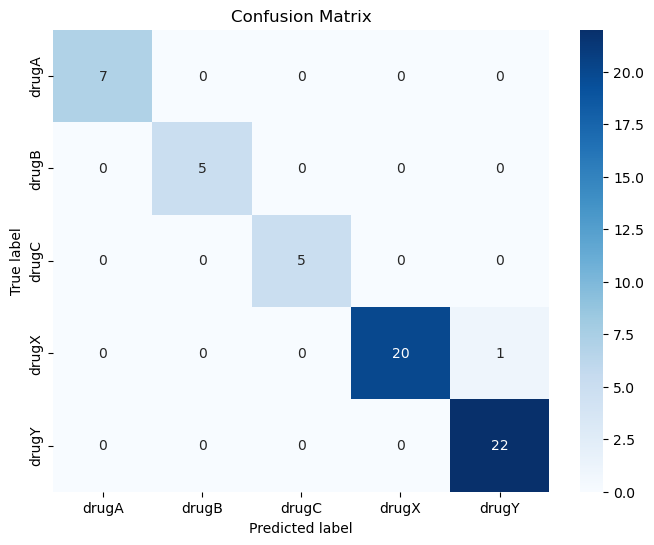

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Generate the confusion matrix
cm = metrics.confusion_matrix(y_test, predTree)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=drugTree.classes_,
            yticklabels=drugTree.classes_)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# print the classification report
print("Classification report: \n", metrics.classification_report(y_test, predTree))
# print the feature importance
print("Feature importance: \n", drugTree.feature_importances_)
# print the feature names
print("Feature names: \n", df.columns)


Classification report: 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

Feature importance: 
 [0.09749785 0.         0.3295848  0.05454991 0.51836744]
Feature names: 
 Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [15]:
feature_importance = drugTree.feature_importances_
feature_names = df.columns[:-1]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


       Feature  Importance
4      Na_to_K    0.518367
2           BP    0.329585
0          Age    0.097498
3  Cholesterol    0.054550
1          Sex    0.000000


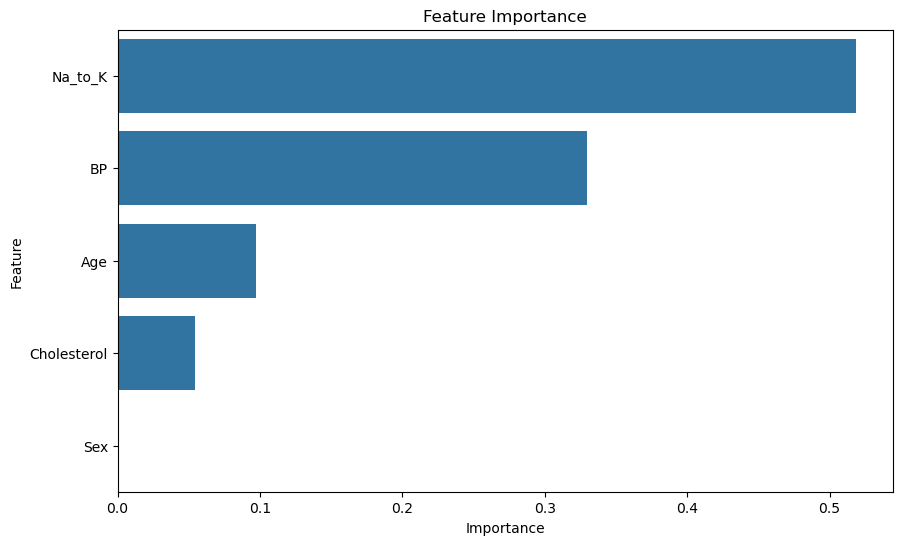

In [16]:


# Plotting the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


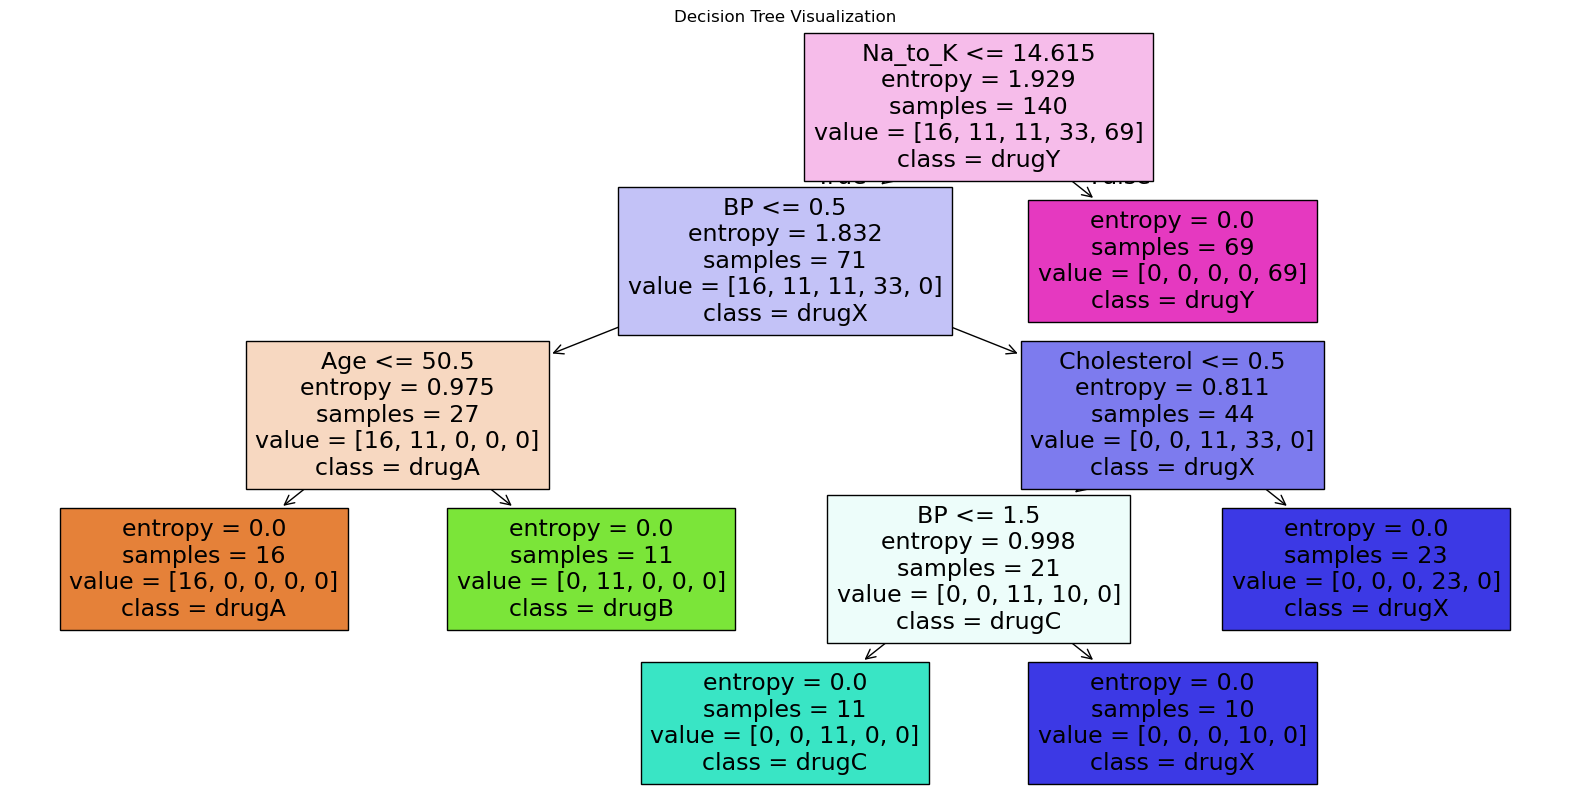

In [17]:




# Visualizing the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(drugTree, feature_names=feature_names, class_names=drugTree.classes_, filled=True)
plt.title('Decision Tree Visualization')
plt.show()
